In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

%matplotlib inline

In [2]:
# read excel file 
x1 = pd.ExcelFile('lendingClub2.xls')
data = x1.parse("Cleansed_Data_20180420")

# display the first 5 rows
data.head()

,Loan_Amnt,annual_inc,dti,Grade_Ord,Emp_Length_Ord,Home_Own_Mortage,Home_Rent_Other,Verification_Status_Yes,Verification_Status_No,Term_36,...,Delinq_2Yrs_No,Years_Since_CR_Line,mths_since_last_delinq,revol_bal,revol_util,open_acc,total_acc,pub_rec,pub_rec_bankruptcies,Loan_Status_Final
0,5000,24000.0,27.65,2,10.0,0,1,1,0,1,...,1,26,0,13648,83.7,3,9,0,0,0
1,2500,30000.0,1.00,3,0.5,0,1,1,0,0,...,1,12,0,1687,9.4,3,4,0,0,1
2,2400,12252.0,8.72,3,10.0,0,1,0,1,1,...,1,10,0,2956,98.5,2,10,0,0,0
3,10000,49200.0,20.00,3,10.0,0,1,1,0,1,...,1,15,35,5598,21.0,10,37,0,0,0
4,3000,80000.0,17.94,2,1.0,0,1,1,0,0,...,1,15,38,27783,53.9,15,38,0,0,0


In [3]:
data = data.fillna(lambda x: x.median())

In [4]:
from sklearn.preprocessing import StandardScaler

y = data.Loan_Status_Final.values
X = data.drop(['Loan_Status_Final', 'Purpose'], axis=1)

ScaledX = StandardScaler().fit_transform(X)

In [5]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, RandomOverSampler

#X_train, X_test, y_train, y_test = train_test_split(ScaledX, y, random_state=42)

#X_new, y_new = resampling(ScaledX, y, rus = RandomOverSampler(random_state=42))

# sm = SMOTE(random_state=12, ratio = 'minority')
# X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [7]:
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression

sm = SMOTE(random_state=12, ratio = 'minority')
X_train_res, y_train_res = sm.fit_sample(ScaledX, y)

param_grid = {'C': [ 0.1, 0.5, 1., 5.], 
              'class_weight': [None, 'balanced'],
              'solver': ['sag', 'liblinear']
             }

clf = LogisticRegression(random_state=0)

grid = GridSearchCV(clf, param_grid, cv=10)
grid.fit(X_train_res,y_train_res)

C:\Users\Rajan\Anaconda2\envs\lendingClub\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Rajan\Anaconda2\envs\lendingClub\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 0.5, 1.0, 5.0], 'solver': ['sag', 'liblinear'], 'class_weight': [None, 'balanced']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [8]:
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

0.627608253415
{'C': 1.0, 'solver': 'sag', 'class_weight': None}
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='sag', tol=0.0001,
          verbose=0, warm_start=False)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, random_state=42)

clf = LogisticRegression(random_state=0, C=1, class_weight=None, solver='sag')


clf.fit(X_train,y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='sag', tol=0.0001,
          verbose=0, warm_start=False)

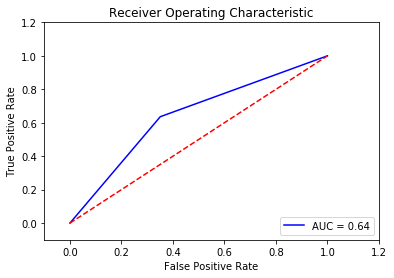

In [10]:
from sklearn import metrics
y_pred = clf.predict(X_test)

false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [11]:
from sklearn.learning_curve import learning_curve

train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5))


C:\Users\Rajan\Anaconda2\envs\lendingClub\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


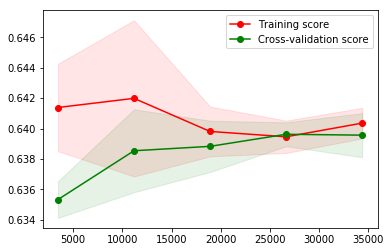

In [12]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")

In [15]:
predicted_probas = clf.predict_proba(X_test)
predicted_probas

array([[0.41011622, 0.58988378],
       [0.61243337, 0.38756663],
       [0.36554093, 0.63445907],
       ...,
       [0.20537427, 0.79462573],
       [0.4584659 , 0.5415341 ],
       [0.43932843, 0.56067157]])

C:\Users\Rajan\Anaconda2\envs\lendingClub\lib\site-packages\scikitplot\plotters.py:37: DeprecationWarning: This module was deprecated in version 0.3.0 and its functions are spread throughout different modules. Please check the documentation and update your function calls as soon as possible. This module will be removed in 0.4.0
  DeprecationWarning)
C:\Users\Rajan\Anaconda2\envs\lendingClub\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


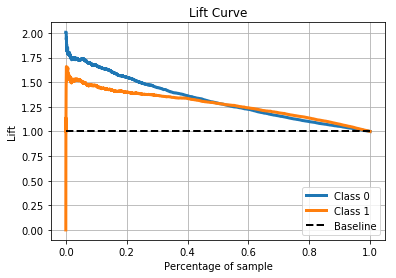

In [16]:
import scikitplot as skplt
skplt.metrics.plot_lift_curve(y_test, predicted_probas)
plt.show()